# Utilizarea bibliotecilor numpy si matplotlib

In [1]:
! pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


# Numpy

In [2]:
import numpy as np

## Creare np.arrays

### Initializați folosind o listă din Python

In [3]:
a = np.array([1, 2, 3])
print(a)
# => [1 2 3]

print(type(a))
# tipul obiectului a => <class 'numpy.ndarray'>

print(a.dtype)
# tipul elementelor din a => int32

print(a.shape)
# tuple continand lungimea lui a pe fiecare dimensiune => (3,)

print(a[0])
# acceseaza elementul avand indexul 0 => 1

b = np.array([[1, 2, 3], [4, 5, 6]])
print(b.shape)
# => (2, 3)

print(b[0][2])
# => 3

print(b[0, 2])
# => 3

c = np.asarray([[1, 2], [3, 4]])
print(type(c))
# => <class 'numpy.ndarray'>

print(c.shape)
# => (2, 2)

[1 2 3]
<class 'numpy.ndarray'>
int32
(3,)
1
(2, 3)
3
3
<class 'numpy.ndarray'>
(2, 2)


### Creați folosind funcții din numpy

In [4]:
zero_array = np.zeros((3, 2))
print(zero_array)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [5]:
ones_array = np.ones((2, 2))
print(ones_array)

[[1. 1.]
 [1. 1.]]


In [6]:
constant_array = np.full((2, 2), 8)
print(constant_array)

[[8 8]
 [8 8]]


In [7]:
identity_matrix = np.eye(3)
print(identity_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [8]:
random_array = np.random.random((1,2))
print(random_array)

[[0.15640557 0.66900369]]


In [9]:
mu, sigma = 0, 0.1
gaussian_random = np.random.normal(mu, sigma, (3,6))
# https://en.wikipedia.org/wiki/Normal_distribution
print(gaussian_random)

[[-0.10729702 -0.04078485 -0.2730846  -0.07829121 -0.06321283  0.030928  ]
 [-0.04026459 -0.07878128  0.02311285 -0.00488676  0.06916239 -0.06906248]
 [ 0.23143492  0.11406271  0.07865738  0.0213476  -0.0218874   0.03433549]]


In [10]:
first_5 = np.arange(5)
print(first_5)

[0 1 2 3 4]


## Indexare

### Slicing: extragerea unei submulțimi - trebuie specificați indecșii doriți pe fiecare dimensiune 

In [11]:
array_to_slice = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(array_to_slice)
slice = array_to_slice[:, 0:3]
# luam toate liniile si coloanele 0, 1, 2
print(slice)

#!!!!! slice-ul returneaza o parte din array la aceeasi adresa de memorie
slice[0][0] = 100
print(array_to_slice)

slice_copy = np.copy(array_to_slice[:, 0:3])
slice_copy[0][0] = 10000
print(slice_copy)
print(array_to_slice)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]
[[100   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]
[[10000     2     3]
 [    5     6     7]
 [    9    10    11]]
[[100   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]


In [12]:
# la apelul unei functii un array se poate modifica accidental\
# daca nu se face copie
def f(ar):
  ar[0] = 0
  ar += 10

x = np.ones(10)
print(x)
f(x)
print(x)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[10. 11. 11. 11. 11. 11. 11. 11. 11. 11.]


În cazul în care unul din indecși este un întreg, dimensiunea
submulțimii returnate este mai mică decât dimensiunea inițială:

In [13]:
slice_1 = array_to_slice[2:3, :]
print(slice_1)

[[ 9 10 11 12]]


In [14]:
slice_2 = array_to_slice[2, :]
print(slice_2)

[ 9 10 11 12]


In [15]:
slice_1d = np.ravel(slice_1)
print(slice_1d)

[ 9 10 11 12]


In [16]:
reshaped_array = np.reshape(array_to_slice, (2, 6))
print(reshaped_array)

[[100   2   3   4   5   6]
 [  7   8   9  10  11  12]]


## Indexare folosind vectori de întregi

In [17]:
array_to_slice = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(array_to_slice[[0,0], [1,3]])

[2 4]


### Indexare folosind vectori de valori bool:

In [18]:
bool_idx = (array_to_slice > 10)
print(bool_idx)
print(array_to_slice[bool_idx])
# direct pe array
print(array_to_slice[array_to_slice > 10])

[[False False False False]
 [False False False False]
 [False False  True  True]]
[11 12]
[11 12]


## Funcții matematice
Operațiile matematice de bază sunt disponibile atât ca funcții NumPy
cât și ca operatori. Acestea sunt aplicate element cu element:

In [19]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [20]:
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [21]:
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [22]:
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [23]:
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [24]:
my_array = np.arange(5)
powered = np.power(my_array, 3)
print(powered)

[ 0  1  8 27 64]


### Produs scalar

In [25]:
x = np.array([[1, 2],[3, 4]])
y = np.array([[5, 6],[7, 8]])

v = np.array([9, 10])
w = np.array([11, 12])

print(v.dot(w))
print(np.dot(v, w))

print(np.matmul(x, v))
print(np.matmul(x, y))

219
219
[29 67]
[[19 22]
 [43 50]]


### Operații pe matrici

In [26]:
my_array = np.array([[1, 2, 3], [4, 5, 6]])
print(my_array)
# transpose
print(my_array.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


In [27]:
my_array = np.array([[1., 2.], [3., 4.]])
print(my_array)
# inversa
print(np.linalg.inv(my_array))

[[1. 2.]
 [3. 4.]]
[[-2.   1. ]
 [ 1.5 -0.5]]


### **Axis** dispune de funcții care realizează operații pe o anumită
dimensiune.

In [28]:
x = np.array([[1, 2],[3, 4]])
# suma pe o anumita dimensiune
print(np.sum(x))
# Suma tuturor elementelor => 10
print(np.sum(x, axis=0))
# Suma pe coloane => [4 6]
print(np.sum(x, axis=1))
# Suma pe linii => [3 7]
# putem specifica si mai multe axe pe care sa se faca operatia:
print(np.sum(x, axis=(0, 1)))
# Suma tuturor elementelor => 10

10
[4 6]
[3 7]
10


In [29]:
# matrice tridimensionala
y = np.array([[[1, 2, 3, 4], [5, 6, 7, 8]], [[1, 2, 3, 4], [5, 6, 7, 8]], [[1, 2, 3,
4], [5, 6, 7, 8]]])
print(y.shape) # shape e un tuplu cu 3 valori
print(y)

(3, 2, 4)
[[[1 2 3 4]
  [5 6 7 8]]

 [[1 2 3 4]
  [5 6 7 8]]

 [[1 2 3 4]
  [5 6 7 8]]]


In [30]:
print(np.mean(y, axis=0)) # media pe axa 0
print(np.mean(y, axis=1)) # media pe axa 1
print(np.mean(y, axis=2)) # media pe axa 2

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
[[3. 4. 5. 6.]
 [3. 4. 5. 6.]
 [3. 4. 5. 6.]]
[[2.5 6.5]
 [2.5 6.5]
 [2.5 6.5]]


In [31]:
# indexul elementului maxim pe fiecare linie
z = np.array([[10, 12, 5], [17, 11 ,19]])
print(np.argmax(z, axis=1))

[1 2]


### Broadcasting
- mecanism care oferă posibilitatea de a realiza operații aritmetice între
vectori de dimensiuni diferite
- vectorul mai mic este multipilcat astfel încât să se potrivească cu cel
mai mare, operația fiind apoi realizată pe cel din urmă

[Reguli de broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

Conform documetatiei: when operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when either:

- they are equal 
- one of them is 1



In [32]:
m = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = m + v
print(y)
# m si v se potrivesc pentru ca ultima dimensiune a lui m e egala cu cea a lui v
print(m.shape)
print(v.shape)
print(y.shape)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]
(4, 3)
(3,)
(4, 3)


# Matplotlib

In [33]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Plotare: cea mai importantă funcție este plot, care permite afișarea datelor 2D

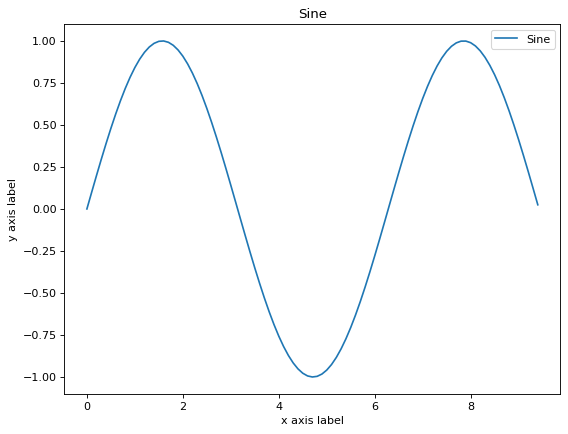

In [34]:
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# instatiem o figure
figure(figsize=(8, 6), dpi=80)
# Ploteaza punctele
plt.plot(x, y)
# Adauga etichete pentru fiecare axa
plt.xlabel('x axis label')
plt.ylabel('y axis label')
# Adauga titlu
plt.title('Sine')
# Adauga legenda
plt.legend(['Sine'])
# Afiseaza figura
plt.show()

OBS. Pentru a plota punctele independent, fără a face interpolare ca în
exemplul anterior, se poate specifica un al treilea parametru în funcția plot, astfel:

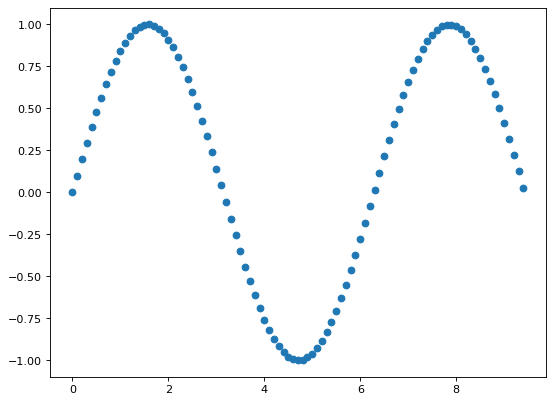

In [35]:
figure(figsize=(8, 6), dpi=80)
plt.plot(x, y, 'o')

### Plotarea mai multor grafice în cadrul aceleiași figuri:

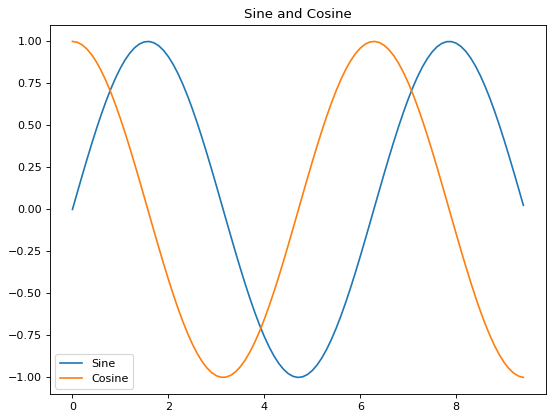

In [36]:
# Calculeaza coordonatele (x, y) ale punctelor de pe o curba sin, respectiv cos
# x - valori de la 0 la 3 * np.pi, luate din 0.1 in 0.1
x = np.arange(0, 3 * np.pi, 0.1)
y_1 = np.sin(x)
y_2 = np.cos(x)

figure(figsize=(8, 6), dpi=80)

# Ploteaza punctele in aceeasi figura
plt.plot(x, y_1)
plt.plot(x, y_2)
# Adauga titlu
plt.title('Sine and Cosine')
# Adauga legenda
plt.legend(['Sine', 'Cosine'])
# Afiseaza figura
plt.show()

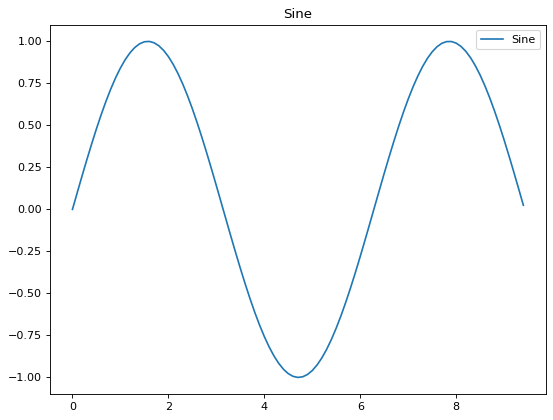

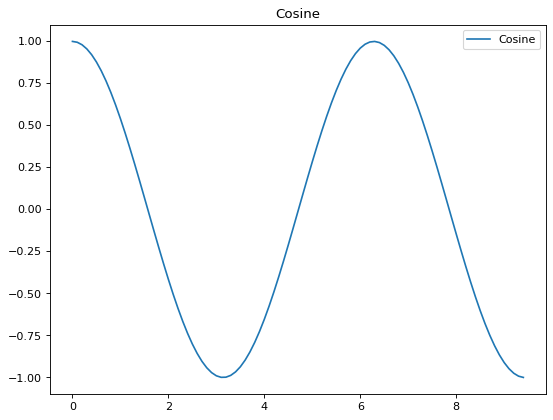

In [37]:
x = np.arange(0, 3 * np.pi, 0.1)
y_1 = np.sin(x)
y_2 = np.cos(x)

# definim primul plot in figura 1
first_plot = figure(1, figsize=(8, 6), dpi=80)
plt.plot(x, y_1)
plt.title('Sine')
plt.legend(['Sine'])

# definim cel de-al doilea plot in figura 2
second_plot = figure(2, figsize=(8, 6), dpi=80)
plt.plot(x, y_2)
plt.title('Cosine')
plt.legend(['Cosine'])
# afisam figurile
plt.show()

### Sublotare: putem plota mai multe subfiguri în cadrul aceleiași figuri

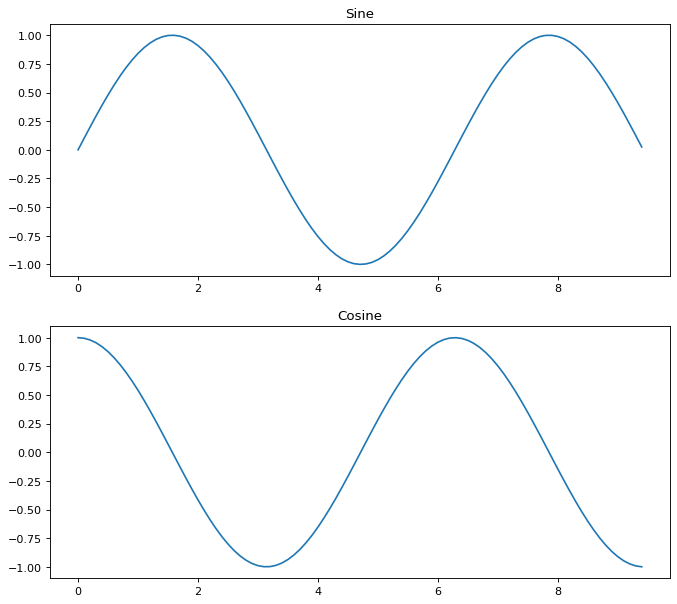

In [38]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)


figure(figsize=(10, 9), dpi=80)

# Creeaza un grid avand inaltimea 2 si latimea 1
# si seteaza primul subplot ca activ
plt.subplot(2, 1, 1)
# Ploteaza primele valori
plt.plot(x, y_sin)
plt.title('Sine')
# Seteaza cel de-al doilea subplot ca activ
# si ploteaza al doilea set de date
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')
# Afiseaza figura
plt.show()

# Exercitii A

1. Plotați implementarea funcției sigmoid din laboratorul anterior
2. Dacă `weights = [-2, 5]` si `bias = 0.2`, plotați dreapta corespunzătoare pentru o serie de puncte din spațiul bidimensional. Hint: folosiți [ecuația dreptei](https://sites.google.com/site/videomeditatii/clase-liceale-9-12/clasa-a-10-a/programa-scolara-pentru-matematica-clasa-a-x-a/ecuatia-dreptei-determinate-de-doua-puncte-distincte-din-plan) `x*w1 + y*w2 + bias = 0`

# Exercitii B

1. Se dau următoarele 9 imagini de dimensiuni 400x600. Valorile acestora au fost salvate în fișierele “images/car_{idx}.npy”.

------

1. Citiți imaginile din aceste fișiere și salvați-le într-un np.array (va avea dimensiunea 9x400x600). Citirea din fișier se face cu ajutorul funcției: `image = np.load(file_path)` Aceasta întoarce un np.array de dimensiune 400x600.

In [39]:
# todo:
image = np.load('images/car_0.npy')

-----
2. Calculați suma valorilor pixelilor tuturor imaginilor.


In [40]:
# todo:
import os
import numpy as np
images = np.array([np.load(f"images/{image}") for image in os.listdir("images")])
images.sum()

269782418

----
3. Calculați suma valorilor pixelilor pentru fiecare imagine în parte.

In [41]:
# todo:
sume = [image.sum() for image in images.sum(axis = 0)]
print(sume)

[860830, 790662, 779443, 782453, 791678, 786906, 801106, 798707, 795100, 794591, 794854, 803901, 785667, 774388, 773496, 772271, 771731, 773972, 775048, 777469, 777788, 775853, 775580, 776112, 777182, 781577, 783592, 783555, 782161, 781833, 784162, 784651, 785933, 789078, 791919, 793043, 791928, 790158, 788954, 791542, 792689, 790937, 793640, 796406, 797557, 798982, 803311, 805220, 802824, 803235, 802968, 803263, 805834, 809118, 812531, 813083, 814482, 813484, 813927, 812603, 812805, 816833, 820719, 823336, 824306, 826064, 825949, 824766, 825291, 829839, 831878, 840272, 844766, 847173, 850405, 850478, 852498, 851714, 850442, 853056, 861406, 864086, 864001, 862418, 870844, 871164, 874303, 873970, 868755, 871473, 870926, 871573, 873296, 876446, 878609, 881897, 884202, 887281, 891559, 894762, 895529, 898493, 899465, 899503, 897614, 894343, 892443, 893268, 893979, 895986, 896458, 896701, 897149, 897043, 896013, 894752, 891801, 890368, 891955, 897654, 903950, 907988, 909674, 908561, 905020,

----
4. Afișați indexul imaginii cu suma maximă.

In [42]:
# todo:
print(np.argmax(sume))

122


----
5. Calculați imaginea medie și afișati-o.
Afișarea imaginii medii se poate face folosind biblioteca scikit-image în
următorul mod:

In [43]:
! pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable


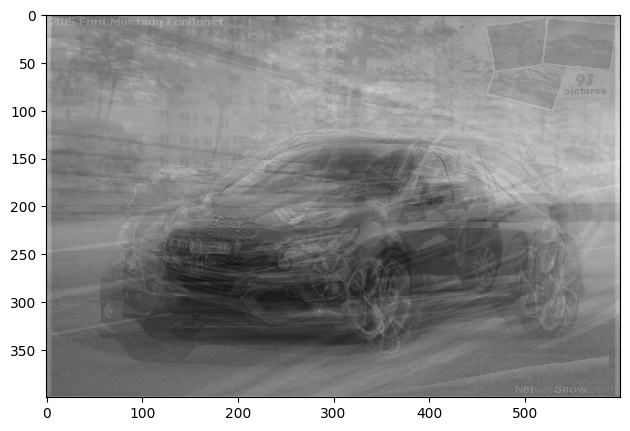

In [44]:
from skimage import io

img_medie = np.uint8(np.mean(images, axis=0))
io.imshow(img_medie.astype(np.uint8)) # petru a putea fi afisata
# imaginea trebuie sa aiba
# tipul unsigned int
io.show()

----
6. Cu ajutorul funcției `np.std(images_array)`, calculați deviația standard a
imaginilor.

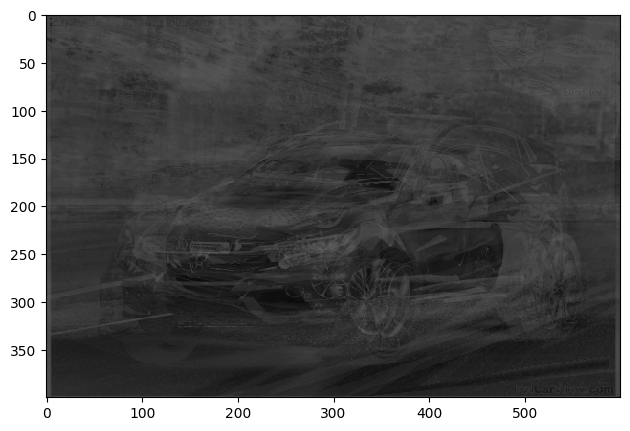

In [45]:
# todo:
d = np.uint8(np.std(images, axis=0))
io.imshow(d.astype(np.uint8))  # petru a putea fi afisata
io.show()


----
7. Normalizați imaginile (se scade imaginea medie și se împarte rezultatul la deviația standard)

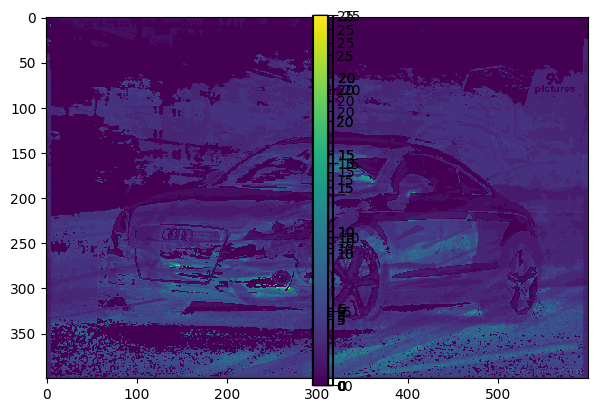

In [48]:
# todo:

img_norm = np.uint8([(img-img_medie) // d for img in images])
[io.imshow(img.astype(np.uint8)) for img in img_norm] # petru a putea fi afisata
io.show()


----
8. Decupați fiecare imagine, afișând numai liniile cuprinse între 200 și 300, respectiv coloanele cuprinse între 280 și 400.

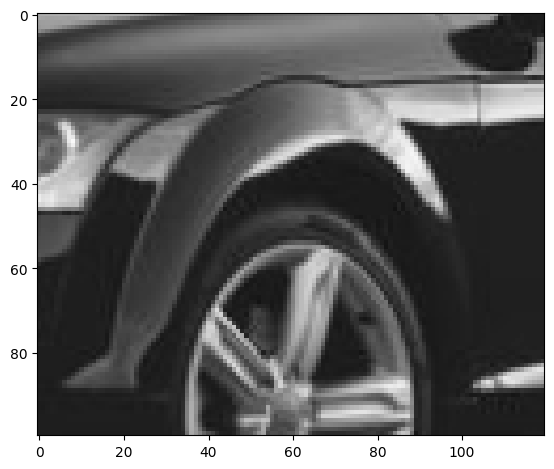

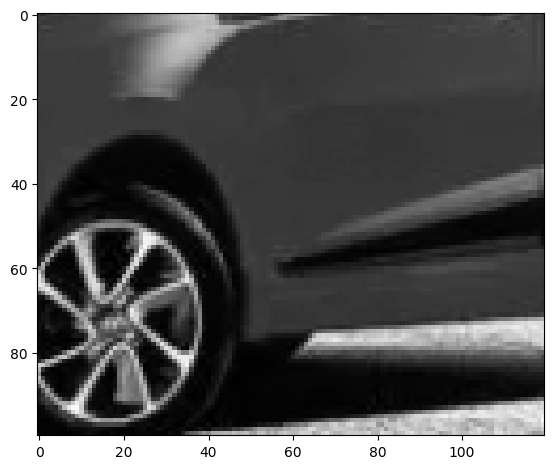

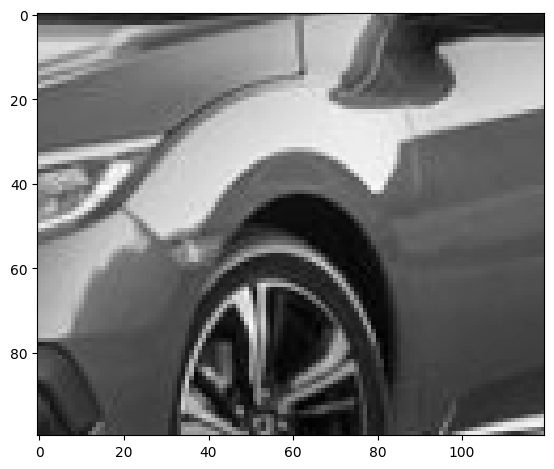

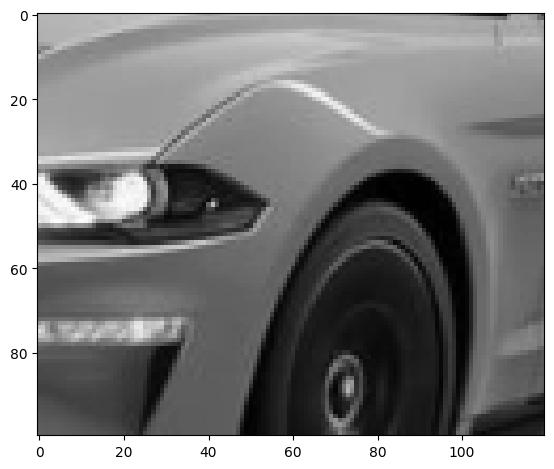

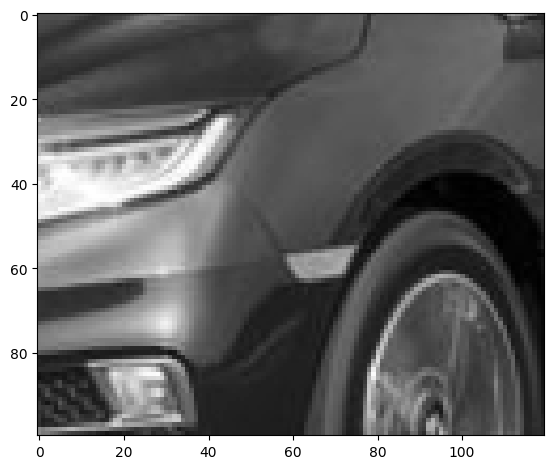

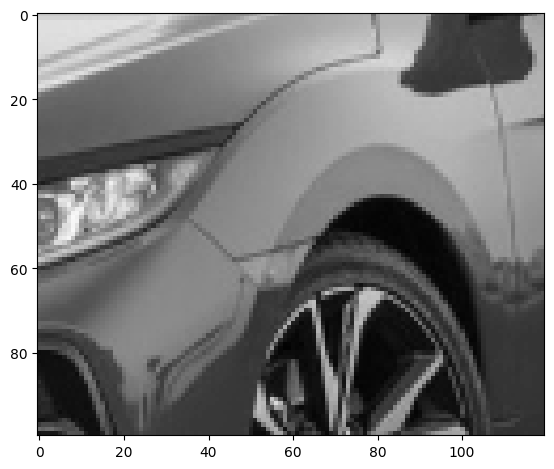

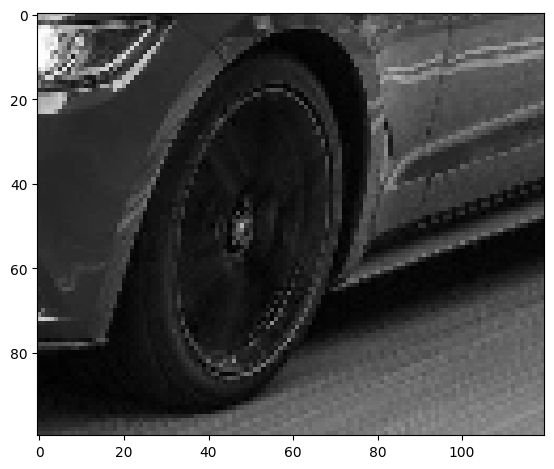

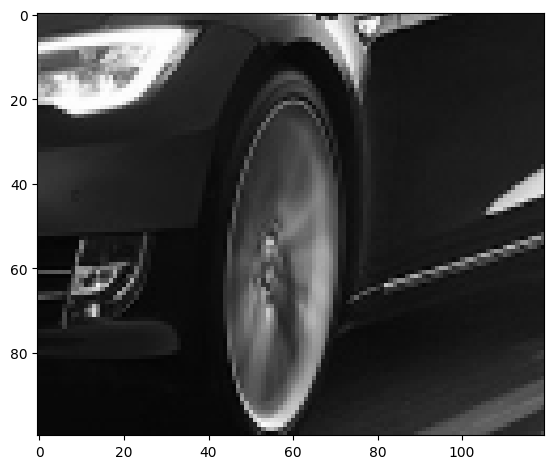

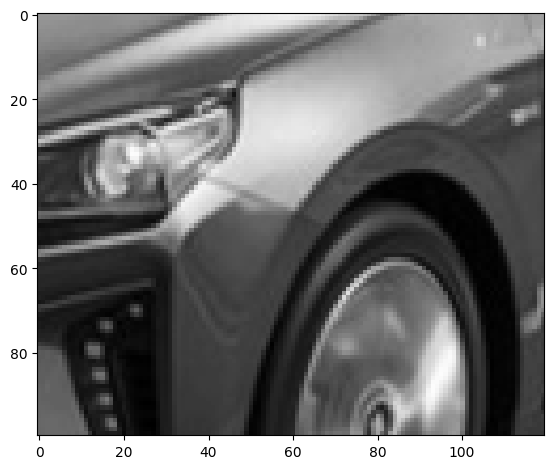

In [47]:
# todo:
for img in images:
    img_decup = img[200:300, 280:400].copy()
    io.imshow(img_decup.astype(np.uint8))  # petru a putea fi afisata
    io.show()